### Importing Necessary Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

### Loading the Dataset

In [2]:
gold_data = pd.read_csv('gold_price_data.csv')

In [3]:
gold_data

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...,...
2285,5/8/2018,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.380000,15.5600,1.193118


In [4]:
gold_data.shape

(2290, 6)

### Getting some information out of the dataset

In [5]:
gold_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


### Checking for null values

In [6]:
gold_data.isnull().sum()

Date       0
SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

### Checking the relation between different columns

In [7]:
correlation = gold_data.corr()

C:\Users\Somenath\AppData\Local\Temp\ipykernel_23492\1828644926.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = gold_data.corr()


### Constructing heap map to understand the correlation

<Axes: >

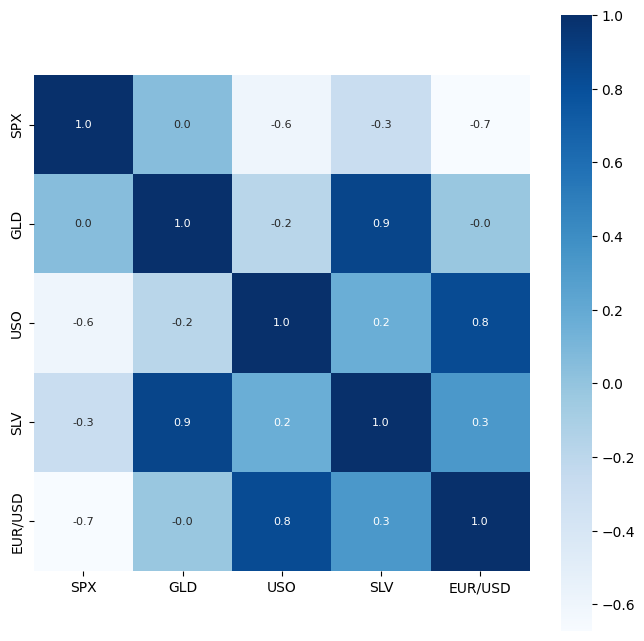

In [8]:
plt.figure(figsize=(8, 8))
sns.heatmap(correlation, cbar=True, square=True, fmt='.1f', annot=True, annot_kws={'size' : 8}, cmap='Blues')

### Removing the unnecessary columns

In [9]:
gold_data.drop(columns=["Date"], axis=1, inplace=True)

In [10]:
gold_data.head()

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.180,1.471692
1,1447.160034,85.570000,78.370003,15.285,1.474491
2,1411.630005,85.129997,77.309998,15.167,1.475492
3,1416.180054,84.769997,75.500000,15.053,1.468299
4,1390.189941,86.779999,76.059998,15.590,1.557099


### Splitting the data into features and labels

In [11]:
X = gold_data.drop(columns=['GLD'], axis=1)
y = gold_data['GLD']

In [12]:
X.head()

,SPX,USO,SLV,EUR/USD
0,1447.160034,78.470001,15.180,1.471692
1,1447.160034,78.370003,15.285,1.474491
2,1411.630005,77.309998,15.167,1.475492
3,1416.180054,75.500000,15.053,1.468299
4,1390.189941,76.059998,15.590,1.557099


In [13]:
y.head()

0    84.860001
1    85.570000
2    85.129997
3    84.769997
4    86.779999
Name: GLD, dtype: float64

### Implementing Train Test Split

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)

### Initializing the model

In [15]:
model = RandomForestRegressor(n_estimators=100)

### Training the Model

In [16]:
model.fit(X_train, y_train)

RandomForestRegressor()

### Calculating the accuracy of the model on training and testing data

In [17]:
prediction_X_train = model.predict(X_train)

print(f"Accuracy on training data: {r2_score(y_train, prediction_X_train)}")

Accuracy on training data: 0.9985472154666011


In [18]:
prediction_X_test = model.predict(X_test)

print(f"Accuracy on testing data: {r2_score(y_test, prediction_X_test)}")

Accuracy on testing data: 0.9856786507075391


### Predicted Value VS Actual Value

In [19]:
y_test = y_test.reset_index(drop=True)

for i in range(len(prediction_X_test)):
  print(f"Predicted Gold Price: ${prediction_X_test[i]}. Actual Gold Price: ${y_test[i]}")

Predicted Gold Price: $163.37519983. Actual Gold Price: $161.990005
Predicted Gold Price: $127.4780990399999. Actual Gold Price: $127.580002
Predicted Gold Price: $124.21559980999994. Actual Gold Price: $124.57
Predicted Gold Price: $119.51619887999998. Actual Gold Price: $118.970001
Predicted Gold Price: $126.0253983299998. Actual Gold Price: $125.720001
Predicted Gold Price: $86.12269799000005. Actual Gold Price: $85.129997
Predicted Gold Price: $171.7674023199999. Actual Gold Price: $171.470001
Predicted Gold Price: $137.09639998999995. Actual Gold Price: $155.330002
Predicted Gold Price: $106.92070099999994. Actual Gold Price: $108.089996
Predicted Gold Price: $133.08670155999994. Actual Gold Price: $130.589996
Predicted Gold Price: $120.55769925999994. Actual Gold Price: $119.82
Predicted Gold Price: $124.79140037999996. Actual Gold Price: $124.599998
Predicted Gold Price: $143.46249798000005. Actual Gold Price: $142.380005
Predicted Gold Price: $104.61050034000003. Actual Gold Pr

### Plotting the Predicted Values VS Actual Values on graph

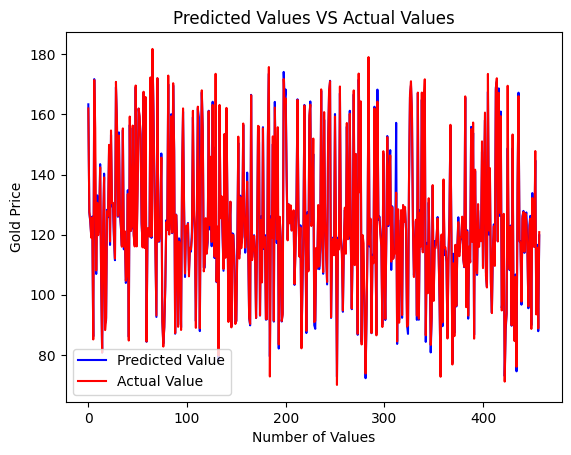

In [20]:
predicted_X_test_plot = list(prediction_X_test)
y_test_plot = list(y_test)

plt.plot(predicted_X_test_plot, color='blue', label='Predicted Value')
plt.plot(y_test_plot, color='red', label='Actual Value')
plt.title('Predicted Values VS Actual Values')
plt.xlabel('Number of Values')
plt.ylabel('Gold Price')
plt.legend()

### Creating a pickle file out of the model

In [21]:
import pickle

with open('gold_price_pred_model.pkl', 'wb') as f:
    pickle.dump(model, f)